## Forecasting with Python

### Introduction to DeepRetail

Deep Retail is an open source package under development by the AI team on VIVES University of Applied Sciences.

The package is used in our research on demand forecasting. 

The main components of the package:

* Data Preprocessing
* Data Exploration 
* Statistical Forecasting
* Easy Evaluation
* **Hierarchical Modelling**
* **Forecasting with Deep Learning**

The aim of the presentation is to showcase the simplicity of the package.

### Installation

#### Install from pip

1. Install python 3.7+
2. Create a virtual env where you want to install: 

    $> source retailanalytics/bin/activate

3. Activate the environment

    $> source retailanalytics/bin/activate

4. Install the package with pip

    $> pip install DeepRetail

#### Install from Github

In [1]:
# !pip install -e git+https://github.com/yForecasting/DeepRetail.git

#### Install Under-Development Version

In [2]:
# git clone https://github.com/jkbr/httpie.git

In [3]:
# pip install -e # from the local folder!

## Small Demonstration:

### Preprocessing

Will work on the M5 Dataset

In [4]:
import pandas as pd

In [5]:
# Define file location
filepath = "/home/filtheo/DeepRetail/m5_week.csv"

# Reading
df = pd.read_csv(filepath, index_col = 0)

In [6]:
df.head()

2011-01-30  2011-02-06  2011-02-13  2011-02-20  \
unique_id                                                            
HOBBIES_1_001_CA_1           0           0           0           0   
HOBBIES_1_002_CA_1           0           0           0           0   
HOBBIES_1_003_CA_1           0           0           0           0   
HOBBIES_1_004_CA_1           0           0           0           0   
HOBBIES_1_005_CA_1           0           0           0           0   

                    2011-02-27  2011-03-06  2011-03-13  2011-03-20  \
unique_id                                                            
HOBBIES_1_001_CA_1           0           0           0           0   
HOBBIES_1_002_CA_1           0           0           0           0   
HOBBIES_1_003_CA_1           0           0           0           0   
HOBBIES_1_004_CA_1           0           2           3           2   
HOBBIES_1_005_CA_1           0           0           0           0   

                    2011-03-27  2011-04-03  ...  2016-03-20  2016-03-27  \
unique_id                                   ...                           
HOBBIES_1_001_CA_1           0           0  ...          10           8   
HOBBIES_1_002_CA_1           0           0  ...           0           4   
HOBBIES_1_003_CA_1           0           0  ...           1           2   
HOBBIES_1_004_CA_1           4           6  ...          14          25   
HOBBIES_1_005_CA_1           0           0  ...          11           6   

                    2016-04-03  2016-04-10  2016-04-17  2016-04-24  \
unique_id                                                            
HOBBIES_1_001_CA_1           2          12           5           8   
HOBBIES_1_002_CA_1           1           0           0           1   
HOBBIES_1_003_CA_1           1           1           8           6   
HOBBIES_1_004_CA_1           6          16          11          18   
HOBBIES_1_005_CA_1          14           4           8          12   

                    2016-05-01  2016-05-08  2016-05-15  2016-05-22  
unique_id                                                           
HOBBIES_1_001_CA_1          10           5          11           7  
HOBBIES_1_002_CA_1           1           1           3           2  
HOBBIES_1_003_CA_1           5           6           4           6  
HOBBIES_1_004_CA_1          14          12           7          16  
HOBBIES_1_005_CA_1          10          15           8           6  

[5 rows x 278 columns]

In [7]:
# Weekly frequency in pivoted format!

Change the format of the DataFrame

In [8]:
from DeepRetail.preprocessing.converters import transaction_df, pivoted_df

In [9]:
trans_df = transaction_df(df, drop_zeros = True) # drop_zeros = False drops zeros to save memory
trans_df

unique_id        date   y
7        HOBBIES_1_008_CA_1  2011-01-30  27
8        HOBBIES_1_009_CA_1  2011-01-30   2
11       HOBBIES_1_012_CA_1  2011-01-30   2
14       HOBBIES_1_015_CA_1  2011-01-30   4
15       HOBBIES_1_016_CA_1  2011-01-30   6
...                     ...         ...  ..
8476215    FOODS_3_823_WI_3  2016-05-22   4
8476216    FOODS_3_824_WI_3  2016-05-22   2
8476217    FOODS_3_825_WI_3  2016-05-22   6
8476218    FOODS_3_826_WI_3  2016-05-22  13
8476219    FOODS_3_827_WI_3  2016-05-22  19

[5096014 rows x 3 columns]

The two formats are used for different purposes.

I can easily resample data to different frequencies


In [10]:
# Define the new frequency 
new_freq = 'M'

pivot_df = pivoted_df(trans_df, target_frequency = new_freq, agg_func = 'sum')
pivot_df.head()

2011-01-31  2011-02-28  2011-03-31  2011-04-30  2011-05-31  \
unique_id                                                                      
FOODS_1_001_CA_1         3.0        40.0        39.0        21.0        52.0   
FOODS_1_001_CA_2         2.0        57.0        32.0        22.0        65.0   
FOODS_1_001_CA_3         3.0        49.0        41.0        63.0        77.0   
FOODS_1_001_CA_4         1.0        16.0        21.0        15.0        24.0   
FOODS_1_001_TX_1         1.0        10.0        21.0        12.0        24.0   

                  2011-06-30  2011-07-31  2011-08-31  2011-09-30  2011-10-31  \
unique_id                                                                      
FOODS_1_001_CA_1        28.0        28.0         2.0         0.0         0.0   
FOODS_1_001_CA_2        54.0        64.0        10.0         0.0         0.0   
FOODS_1_001_CA_3        43.0        60.0        12.0         0.0         2.0   
FOODS_1_001_CA_4        17.0        24.0         1.0         0.0         0.0   
FOODS_1_001_TX_1        18.0        21.0         2.0         0.0         0.0   

                  ...  2015-08-31  2015-09-30  2015-10-31  2015-11-30  \
unique_id         ...                                                   
FOODS_1_001_CA_1  ...        19.0        15.0        16.0        26.0   
FOODS_1_001_CA_2  ...        24.0        22.0        39.0        25.0   
FOODS_1_001_CA_3  ...        21.0        55.0        25.0        37.0   
FOODS_1_001_CA_4  ...        14.0        13.0         4.0         9.0   
FOODS_1_001_TX_1  ...        19.0        14.0        14.0        19.0   

                  2015-12-31  2016-01-31  2016-02-29  2016-03-31  2016-04-30  \
unique_id                                                                      
FOODS_1_001_CA_1        24.0        17.0        20.0        24.0        33.0   
FOODS_1_001_CA_2        34.0        34.0        36.0        28.0        31.0   
FOODS_1_001_CA_3        36.0        29.0        40.0        32.0        24.0   
FOODS_1_001_CA_4        11.0         6.0         0.0        14.0         9.0   
FOODS_1_001_TX_1        23.0        45.0         8.0        17.0         1.0   

                  2016-05-31  
unique_id                     
FOODS_1_001_CA_1        23.0  
FOODS_1_001_CA_2        18.0  
FOODS_1_001_CA_3        27.0  
FOODS_1_001_CA_4         6.0  
FOODS_1_001_TX_1        26.0  

[5 rows x 65 columns]

### Exploratory

Data exploration is very important in every forecasting application.

Before designing a strategy to tackle our problem at hand:

1. Forecasting
2. Outlier Detection
3. Classifiction 

We first **NEED** to understand our data.

If we dont:
* We might spend valuable time and resources for no reason.
* Reach suboptional decisions
* Have no idea why the model works/fails

In [11]:
from DeepRetail.exploratory.stats import print_summary, visualize_series, get_features, intermittency_classification, visualize_pacf, visualize_acf

Important Step 1: Get some very basic information

In [12]:
print_summary(pivot_df)

A total of 30490 items for a total of 65 periods


Important Step 2: Visually inspect as many time series as possible

Tip: I usualy spend 3-4 hours just observing the time series and keeping notes

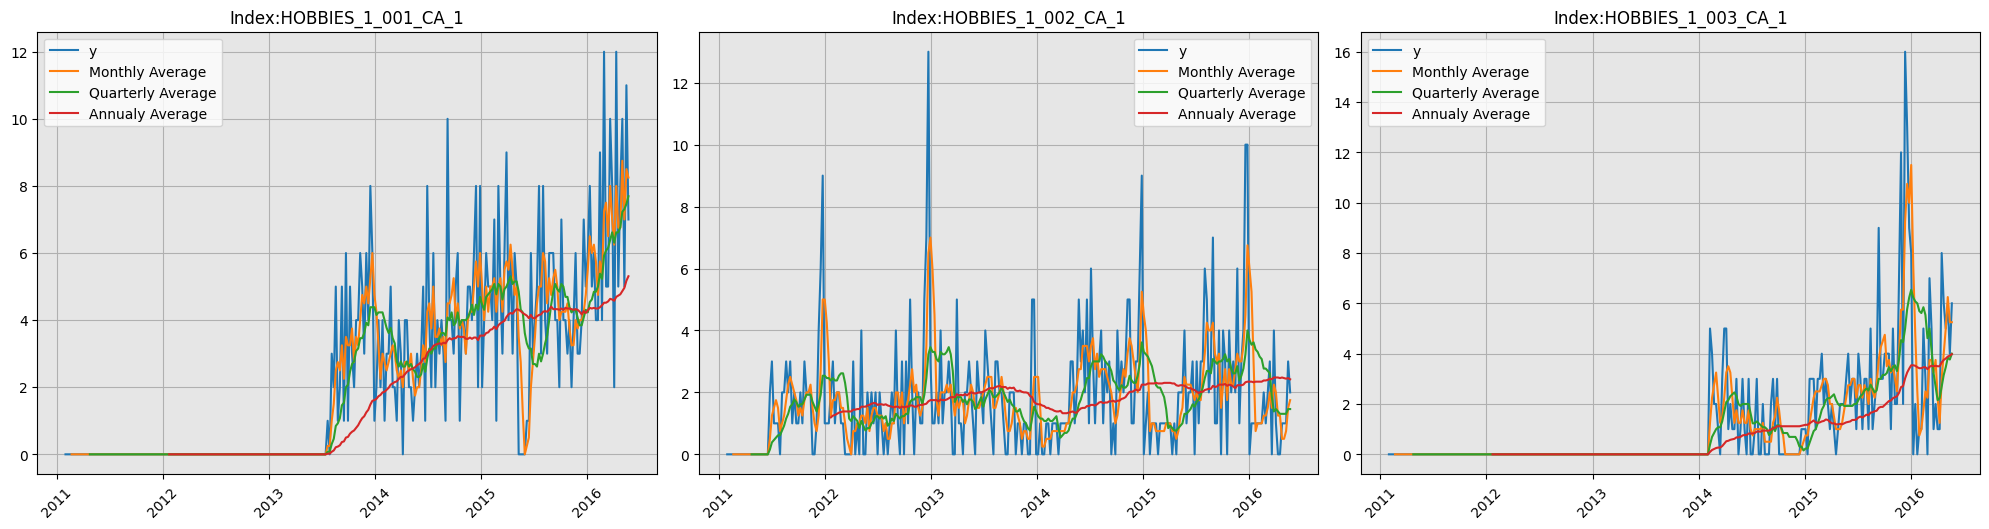

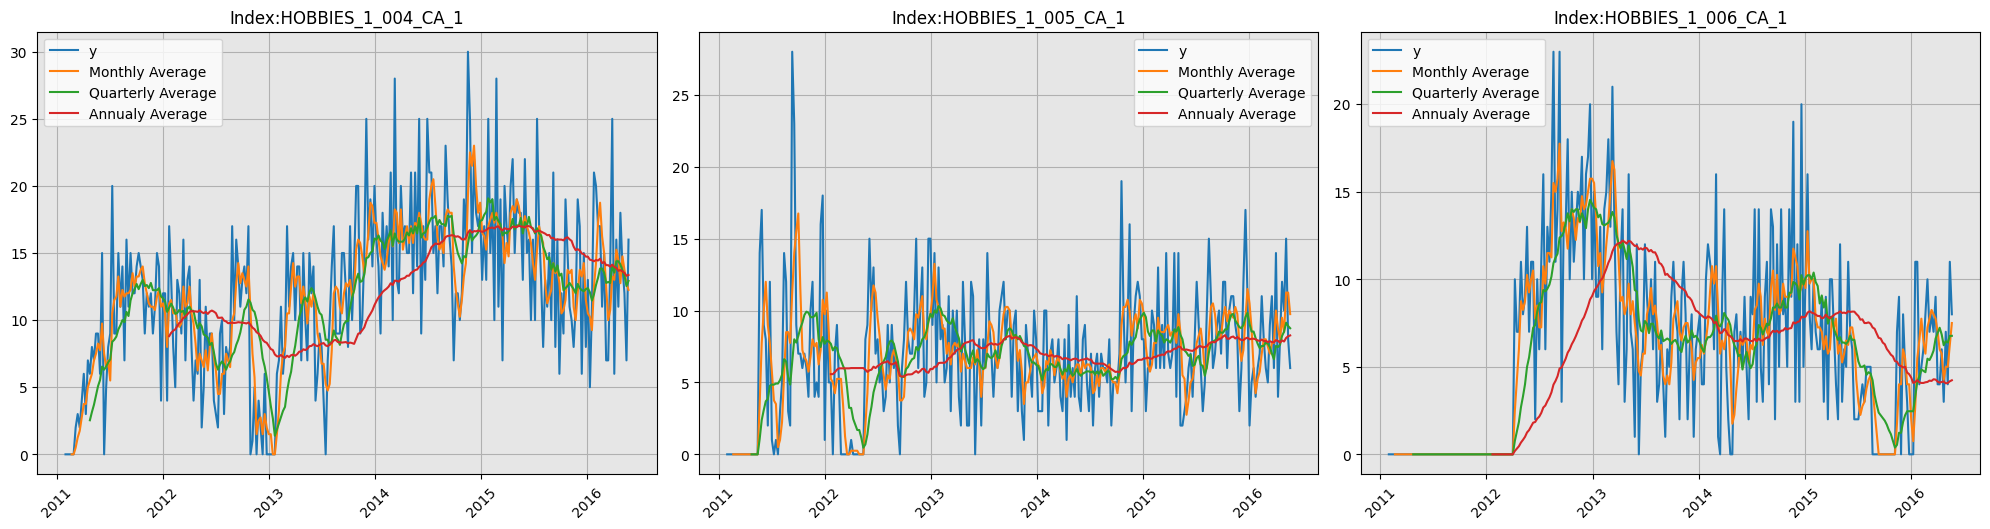

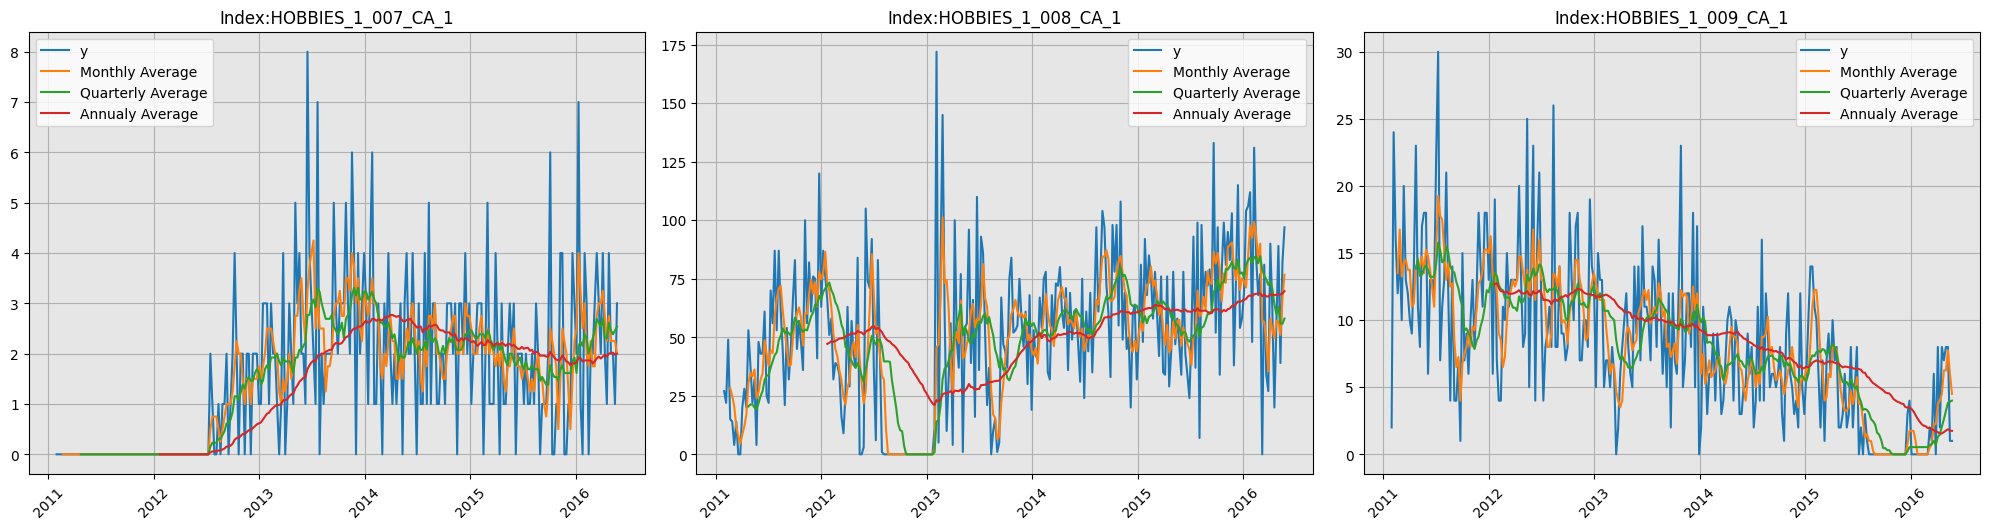

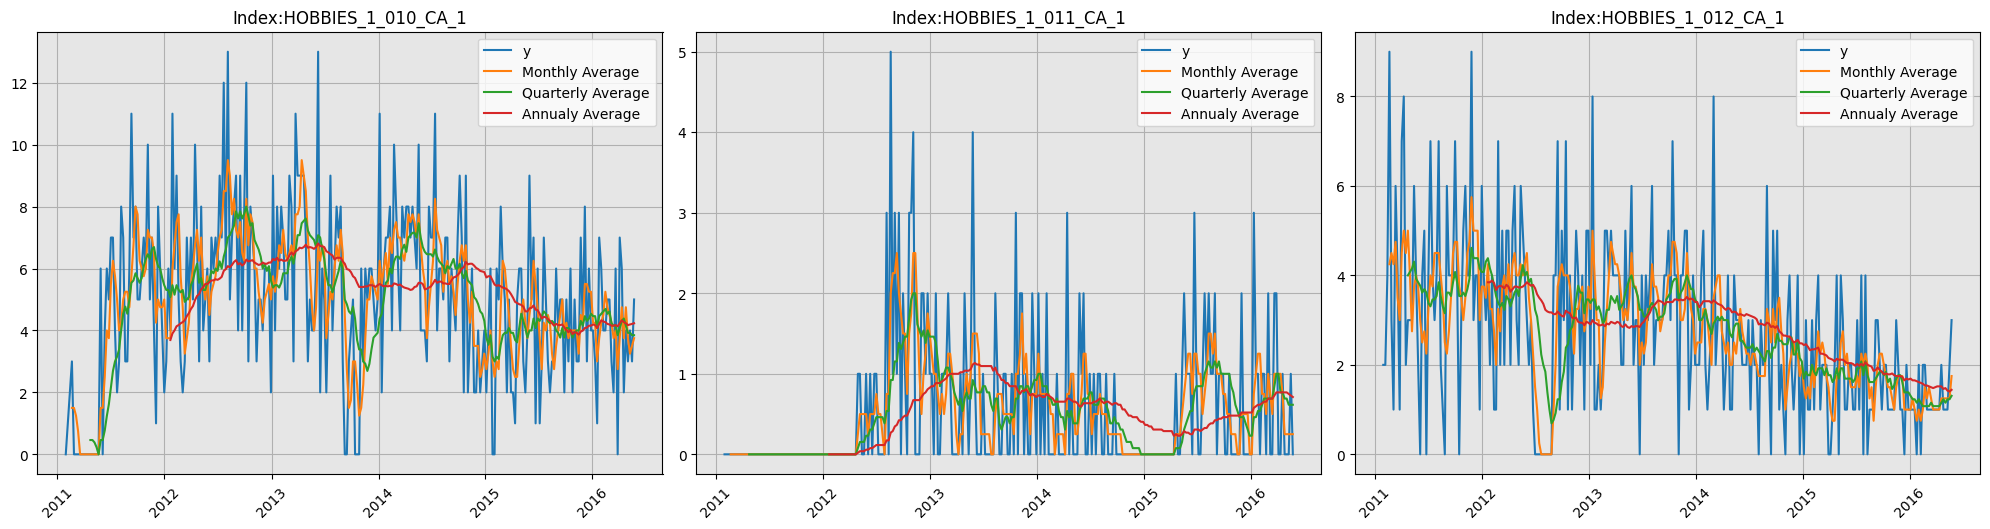

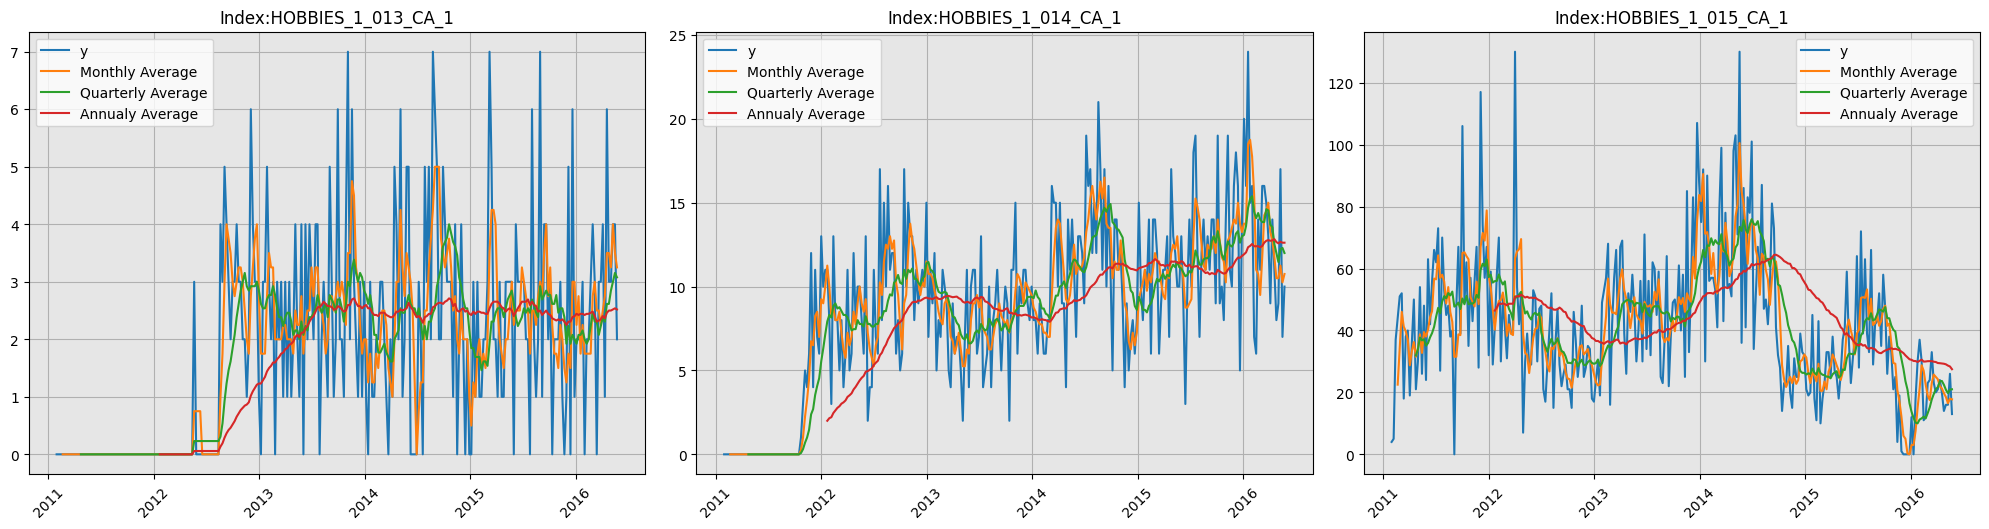

In [13]:
# visualize n series and adds moving averages if asked
visualize_series(pivoted_df = df, n = 15, add_moving_average = True)

Important Step 3: Understand the Characteristics of the Time Series

Some very basic and important features:

1. Trend
2. Seasonality
3. Forecastibility 
    * (Entropy is just a measure for forecastibility. Do not blindly trust it. Its not the most accurate metric)

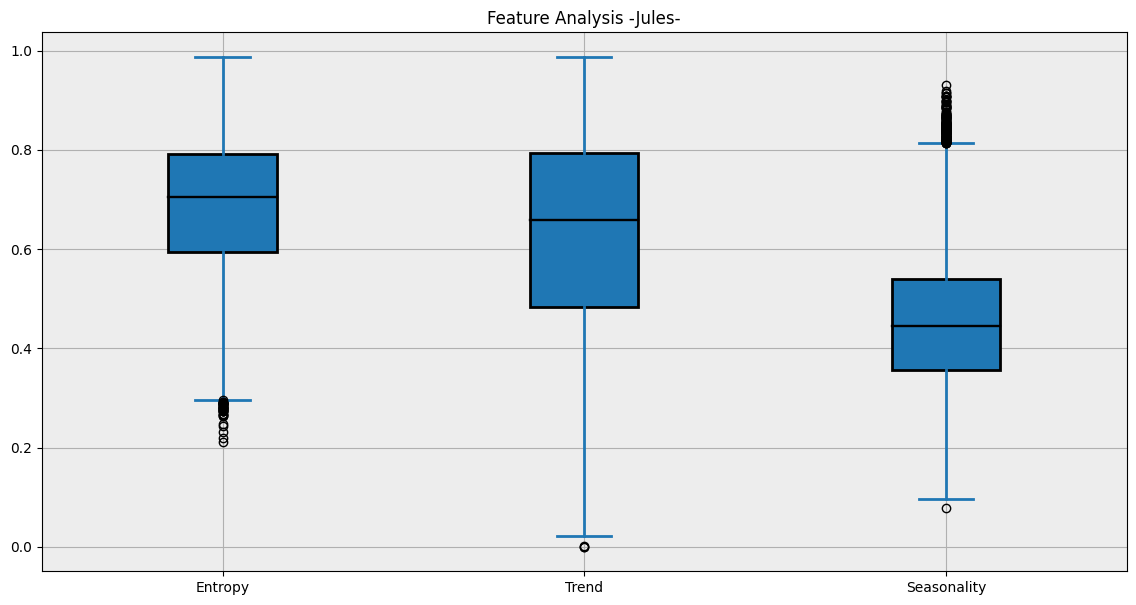

In [14]:
# Lets plot these features
features = get_features(pivot_df, seasonal_period = 12, plot = True)

In [15]:
features.head()

unique_id   entropy  nperiods  seasonal_period     trend     spike  \
0  FOODS_1_001_CA_1  0.851049         1               12  0.301042  0.000236   
1  FOODS_1_001_CA_2  0.810289         1               12  0.368820  0.000088   
2  FOODS_1_001_CA_3  0.848204         1               12  0.396581  0.000054   
3  FOODS_1_001_CA_4  0.842166         1               12  0.182885  0.000075   
4  FOODS_1_001_TX_1  0.812256         1               12  0.511189  0.000077   

   linearity  curvature    e_acf1   e_acf10  seasonal_strength  peak  trough  
0  -1.613218   0.699263  0.268663  0.426798           0.349115    12      10  
1  -1.786639  -0.334238  0.357953  0.518324           0.399566     5      10  
2  -1.851219   0.048018  0.094301  0.188764           0.493961     9      10  
3  -1.465815   0.499290  0.229196  0.337900           0.559717     8       8  
4  -0.351402  -0.748261  0.038686  0.198737           0.336522     1       4

Is our data intermittent?

Smooth: 13758
Erratic: 1390
Intermittent: 13539
Lumpy: 1803


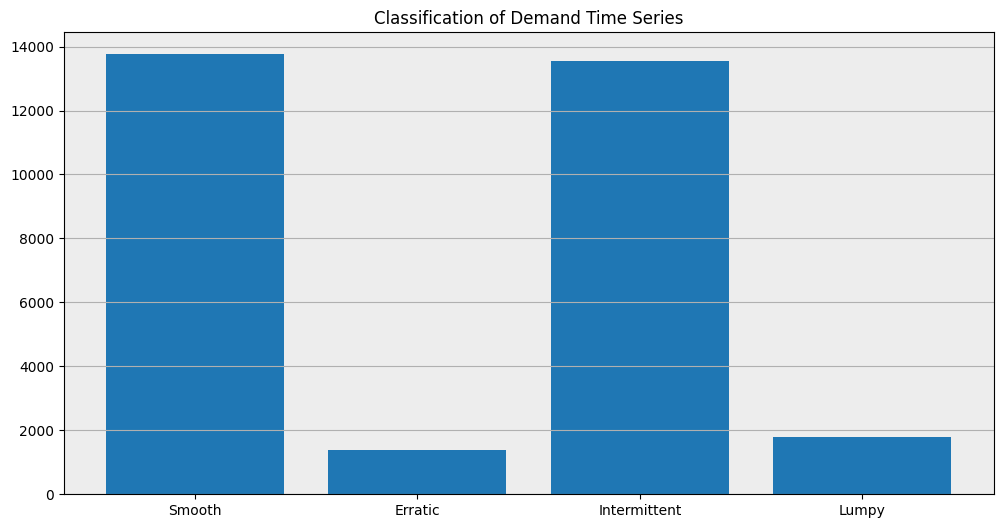

In [16]:
intermittency_classification(pivot_df, plot=True)

PACF, ACF?

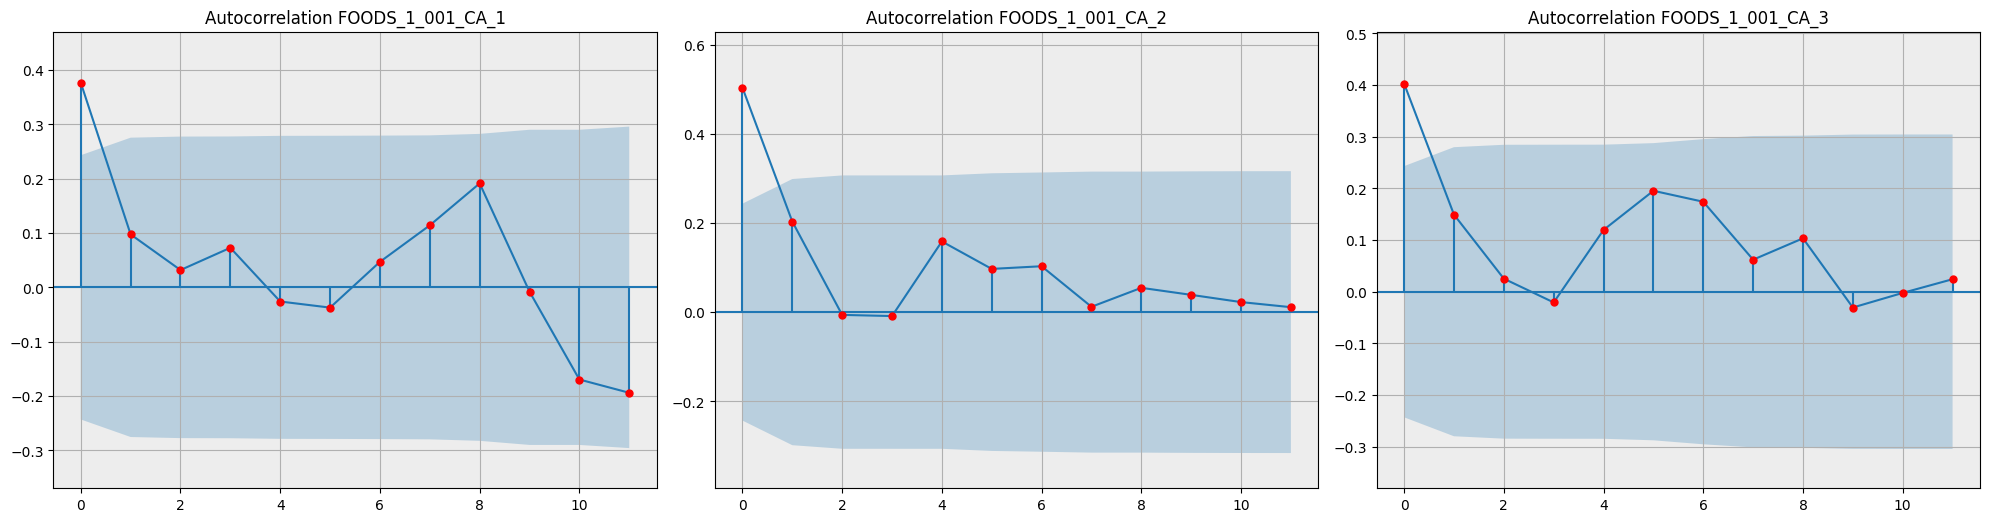

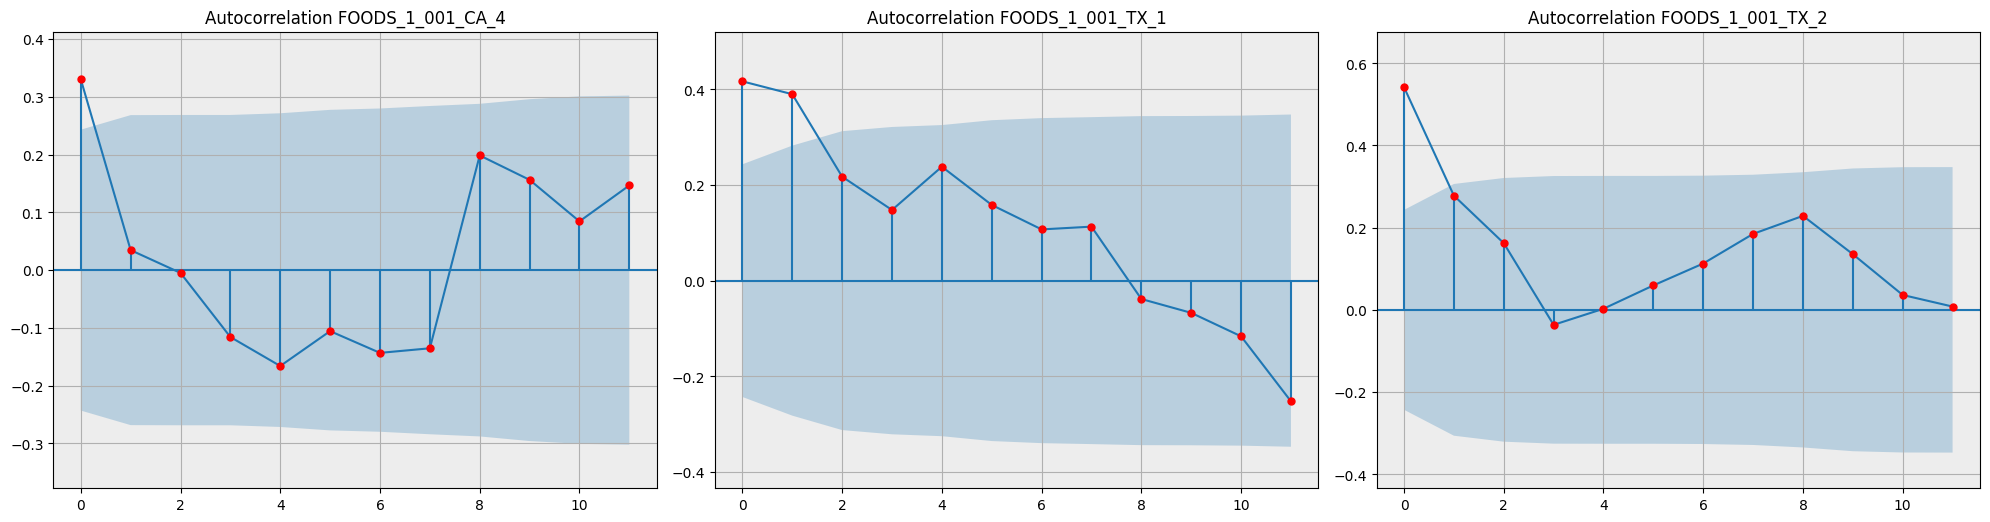

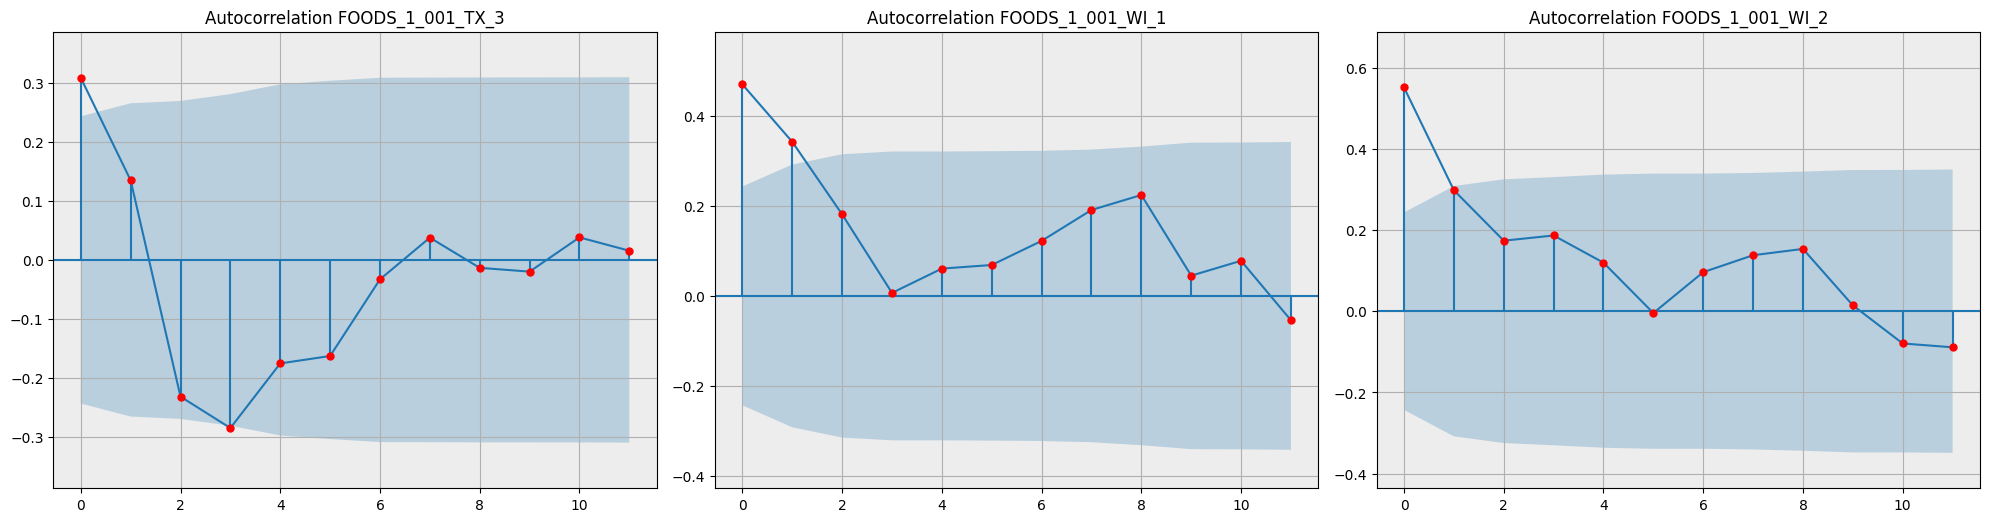

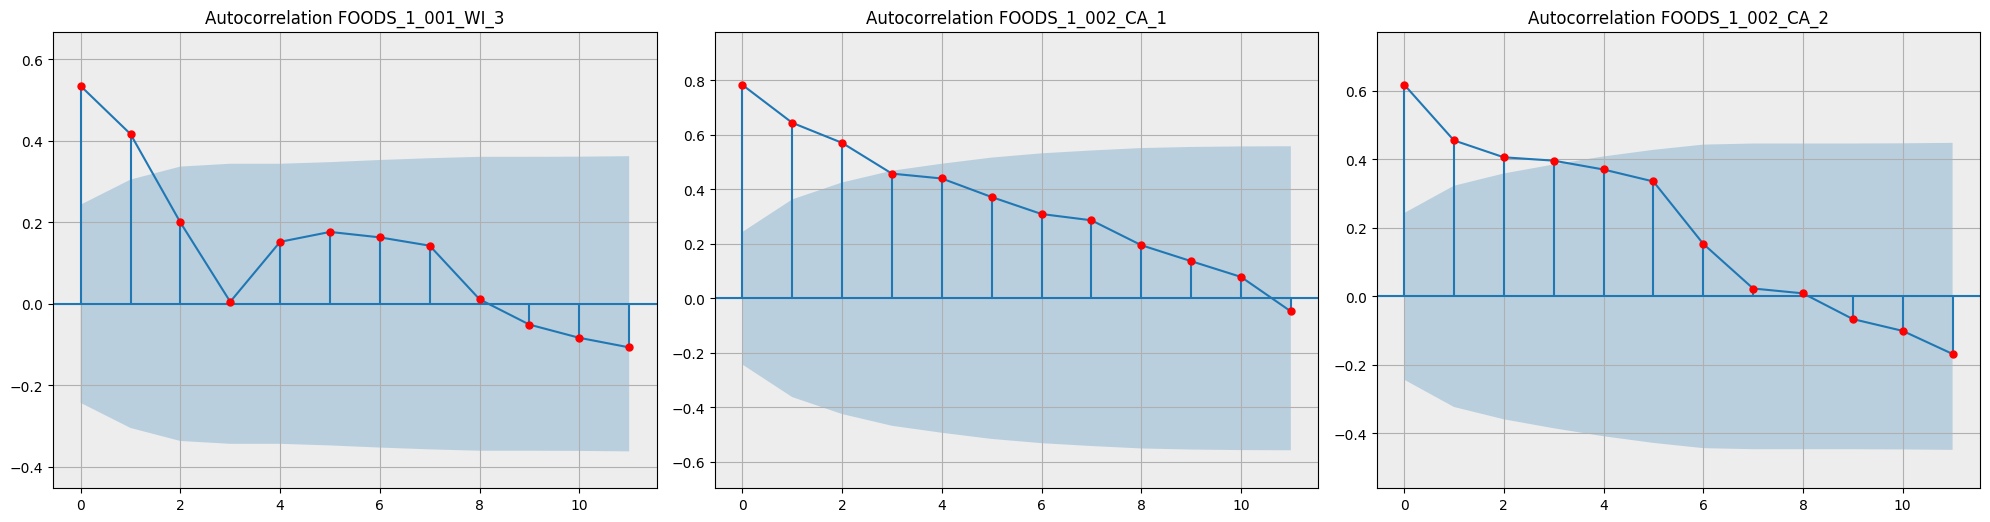

In [17]:
lags = 12 # A year
alpha = 0.05

visualize_acf(pivot_df, n = 12, lags = lags, alpha = alpha )

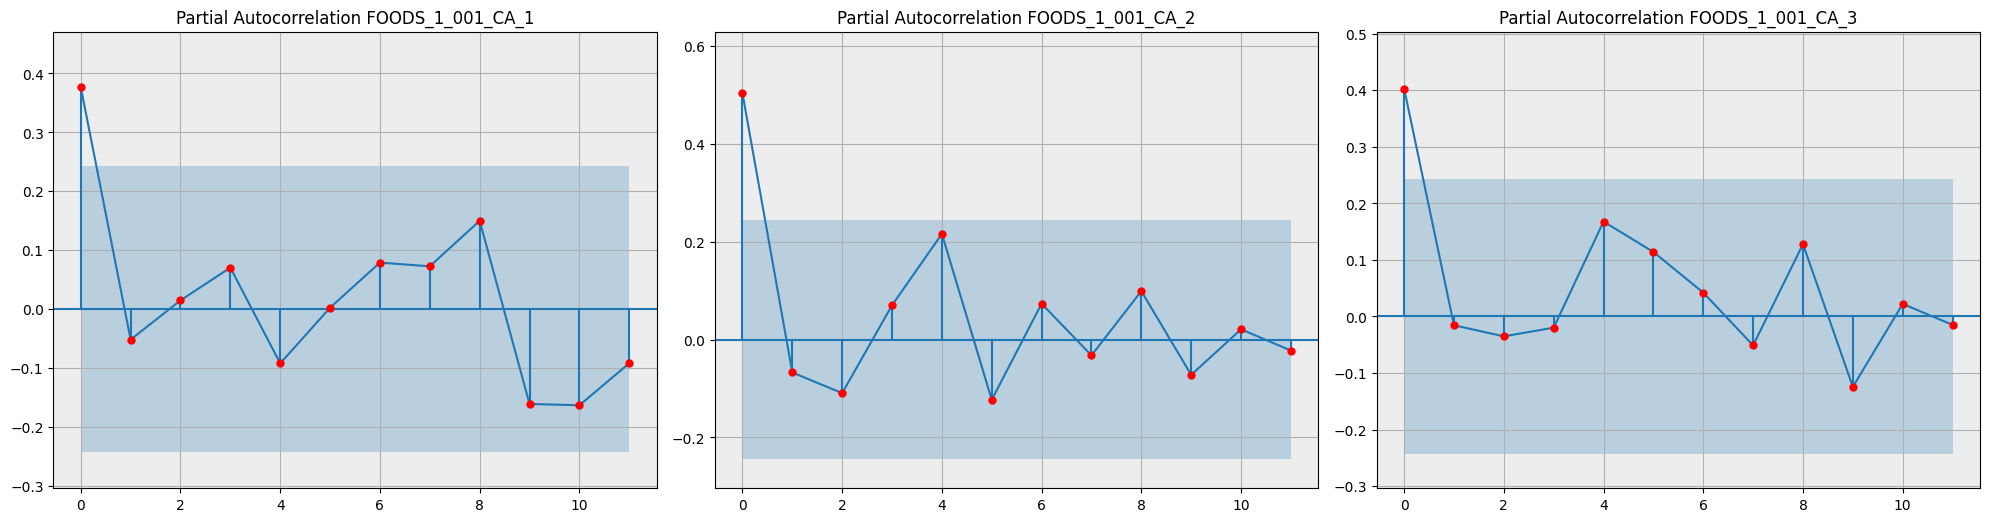

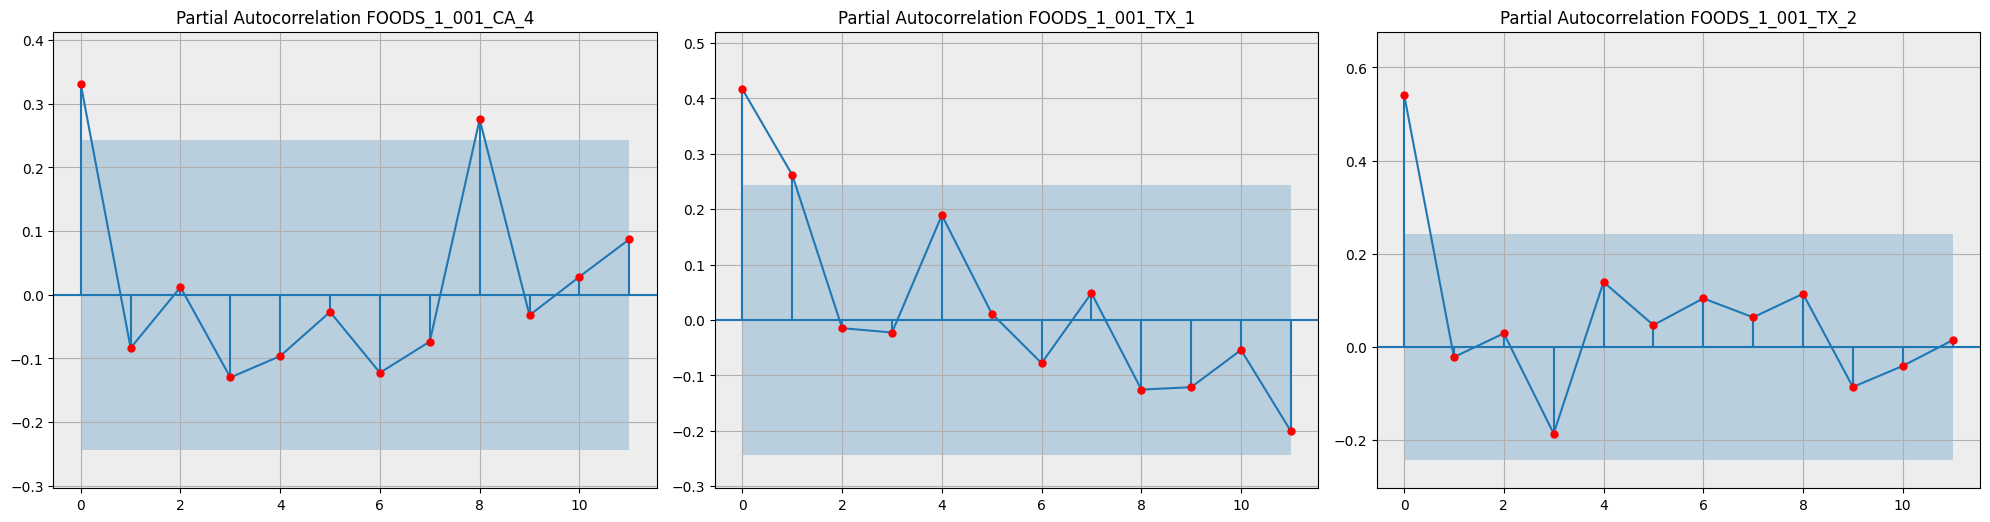

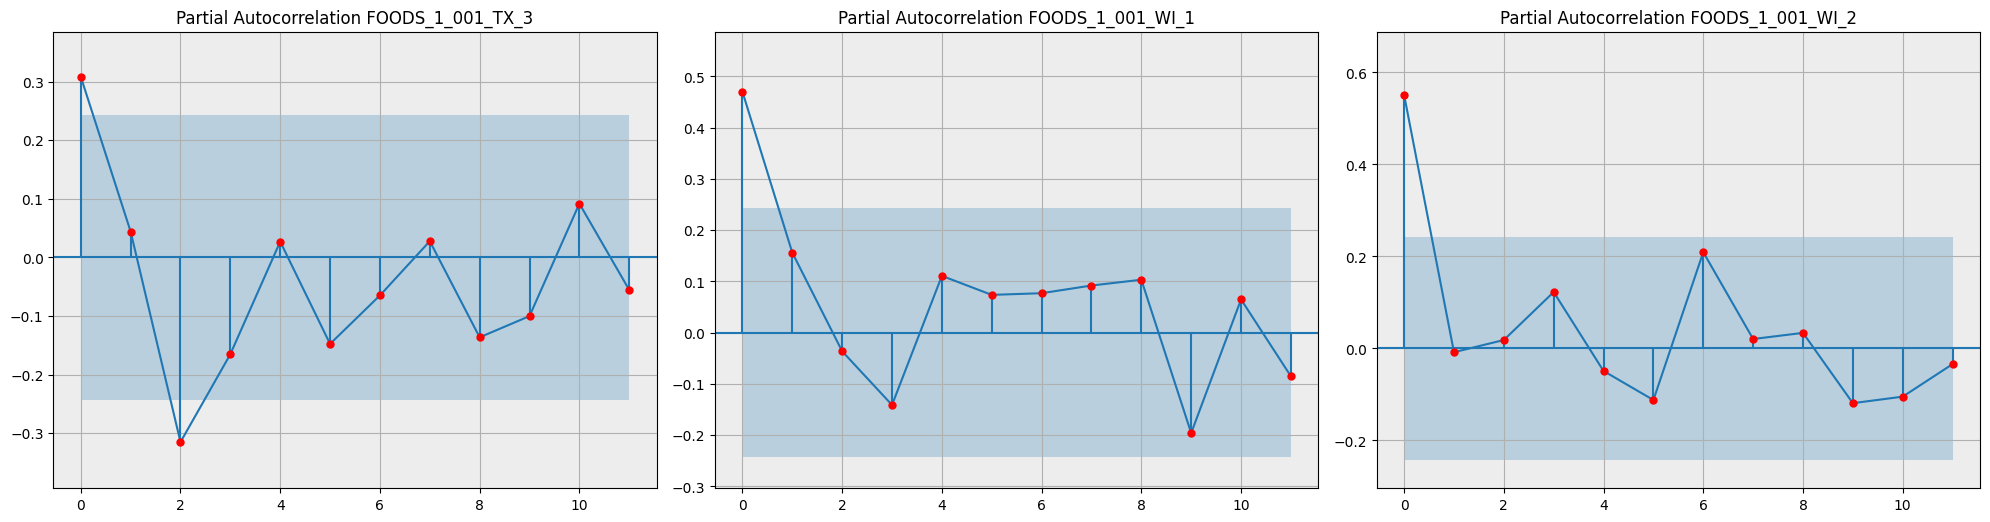

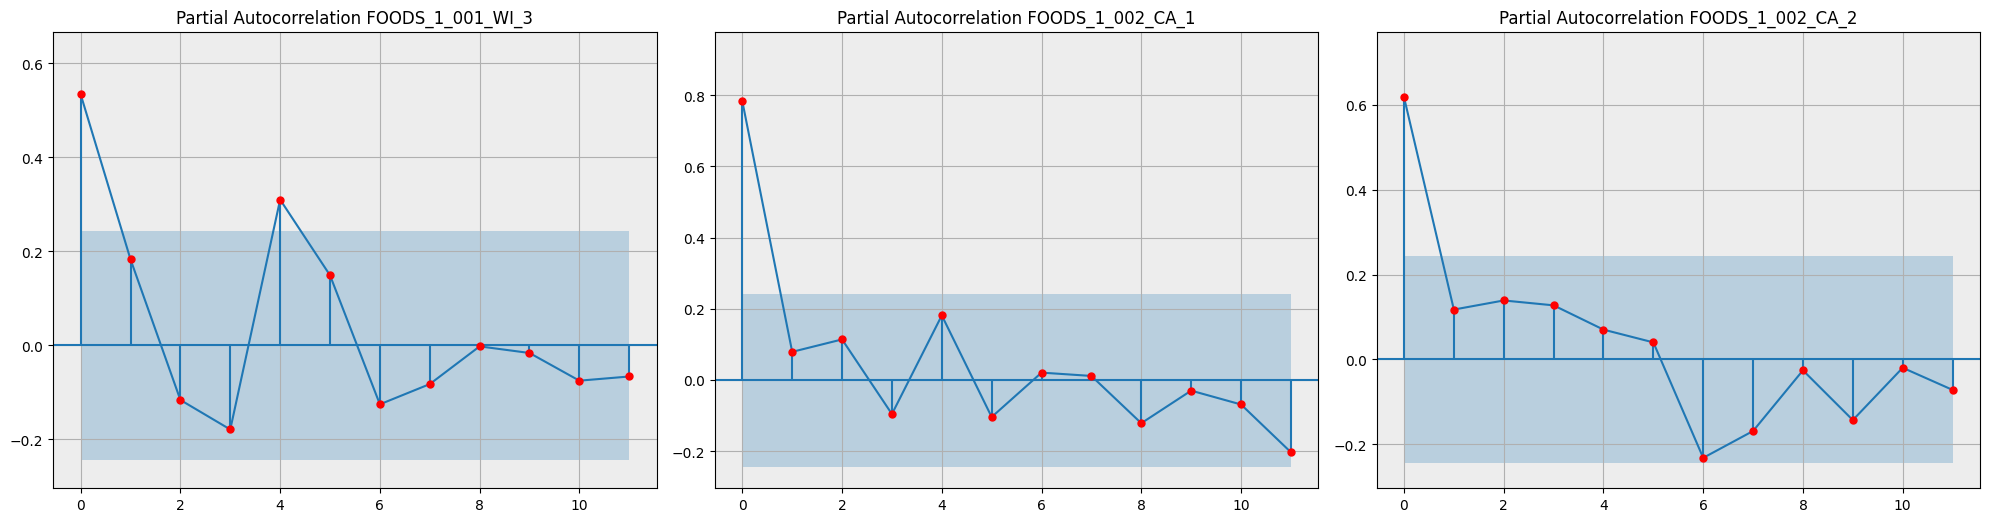

In [18]:
lags = 12 # A year
alpha = 0.05

visualize_pacf(pivot_df, n = 12, lags = lags, alpha = alpha )

#### More Function to Be Added Soon!!

Always understan your data first!!

### Forecasting

The Fun Part.

When we understand our data its time to make predictions

**DeepRetail** makes it very easy to produce forecasts with statistal models

We currently support 4 models:

* ETS
* ARIMA
* Naive
* Seasonal Naive

More to be added soon :)

In [19]:
from DeepRetail.forecasting.statistical import StatisticalForecaster

In [20]:
# Parameter Initialization 
freq = 'M' # give the frequency
models = ['Naive', 'SNaive', 'ARIMA' , 'ETS'] # Pick the Models
h = 6 # How many steps ahead we want to forecast

**DeepRetail** uses StatisticalForecast objects to make forecasts.

Our virtual Forecasting Assistant makes everything very easy

In [21]:
forecaster = StatisticalForecaster(models, freq)

#### Select how many series to forecast.
* M5 includes over 30.000
* We only have 15 mins

Lets pick a small sample only!

In [22]:
total_to_forecast = 30 # pick the number of series to forecast

# Shuffle the dataset so we randomly pick some time series
pivot_df = pivot_df.sample(frac = 1. , random_state = 3)

In [23]:
# We fit the forecaster to the dataset
forecaster.fit(pivot_df, total_to_forecast = total_to_forecast)

Make predictions:

**Note:** 
* The model automatically makes the split between train-test split.
* If we do not want it we set the cv parameter equal to None (still under construction)

In [24]:
# Predict!
pred_df = forecaster.predict(h)

In [25]:
pred_df.head()

date     cutoff         unique_id          y           Model  True  \
0 2015-12-31 2015-11-30  FOODS_1_156_CA_2  42.000000           Naive  34.0   
1 2015-12-31 2015-11-30  FOODS_1_156_CA_2  30.000000  Seasonal Naive  34.0   
2 2015-12-31 2015-11-30  FOODS_1_156_CA_2  37.692463           ARIMA  34.0   
3 2015-12-31 2015-11-30  FOODS_1_156_CA_2  41.770330             ETS  34.0   
4 2016-01-31 2015-11-30  FOODS_1_156_CA_2  42.000000           Naive  44.0   

   fh  cv  
0   1   1  
1   1   1  
2   1   1  
3   1   1  
4   2   1

Get the residuals 

In [26]:
res = forecaster.get_residuals()

In [29]:
res

unique_id     Period  residual  Model
0         FOODS_1_021_CA_2 2011-01-31    0.0000  Naive
1         FOODS_1_021_CA_2 2011-02-28    0.0000  Naive
2         FOODS_1_021_CA_2 2011-03-31    0.0000  Naive
3         FOODS_1_021_CA_2 2011-04-30    0.0000  Naive
4         FOODS_1_021_CA_2 2011-05-31    0.0000  Naive
...                    ...        ...       ...    ...
7675  HOUSEHOLD_2_454_TX_3 2015-12-31   -0.0008    ETS
7676  HOUSEHOLD_2_454_TX_3 2016-01-31   15.0000    ETS
7677  HOUSEHOLD_2_454_TX_3 2016-02-29    9.0015    ETS
7678  HOUSEHOLD_2_454_TX_3 2016-03-31  -19.9991    ETS
7679  HOUSEHOLD_2_454_TX_3 2016-04-30  -11.0020    ETS

[7680 rows x 4 columns]

Or we can directly do some residuals diagnosis

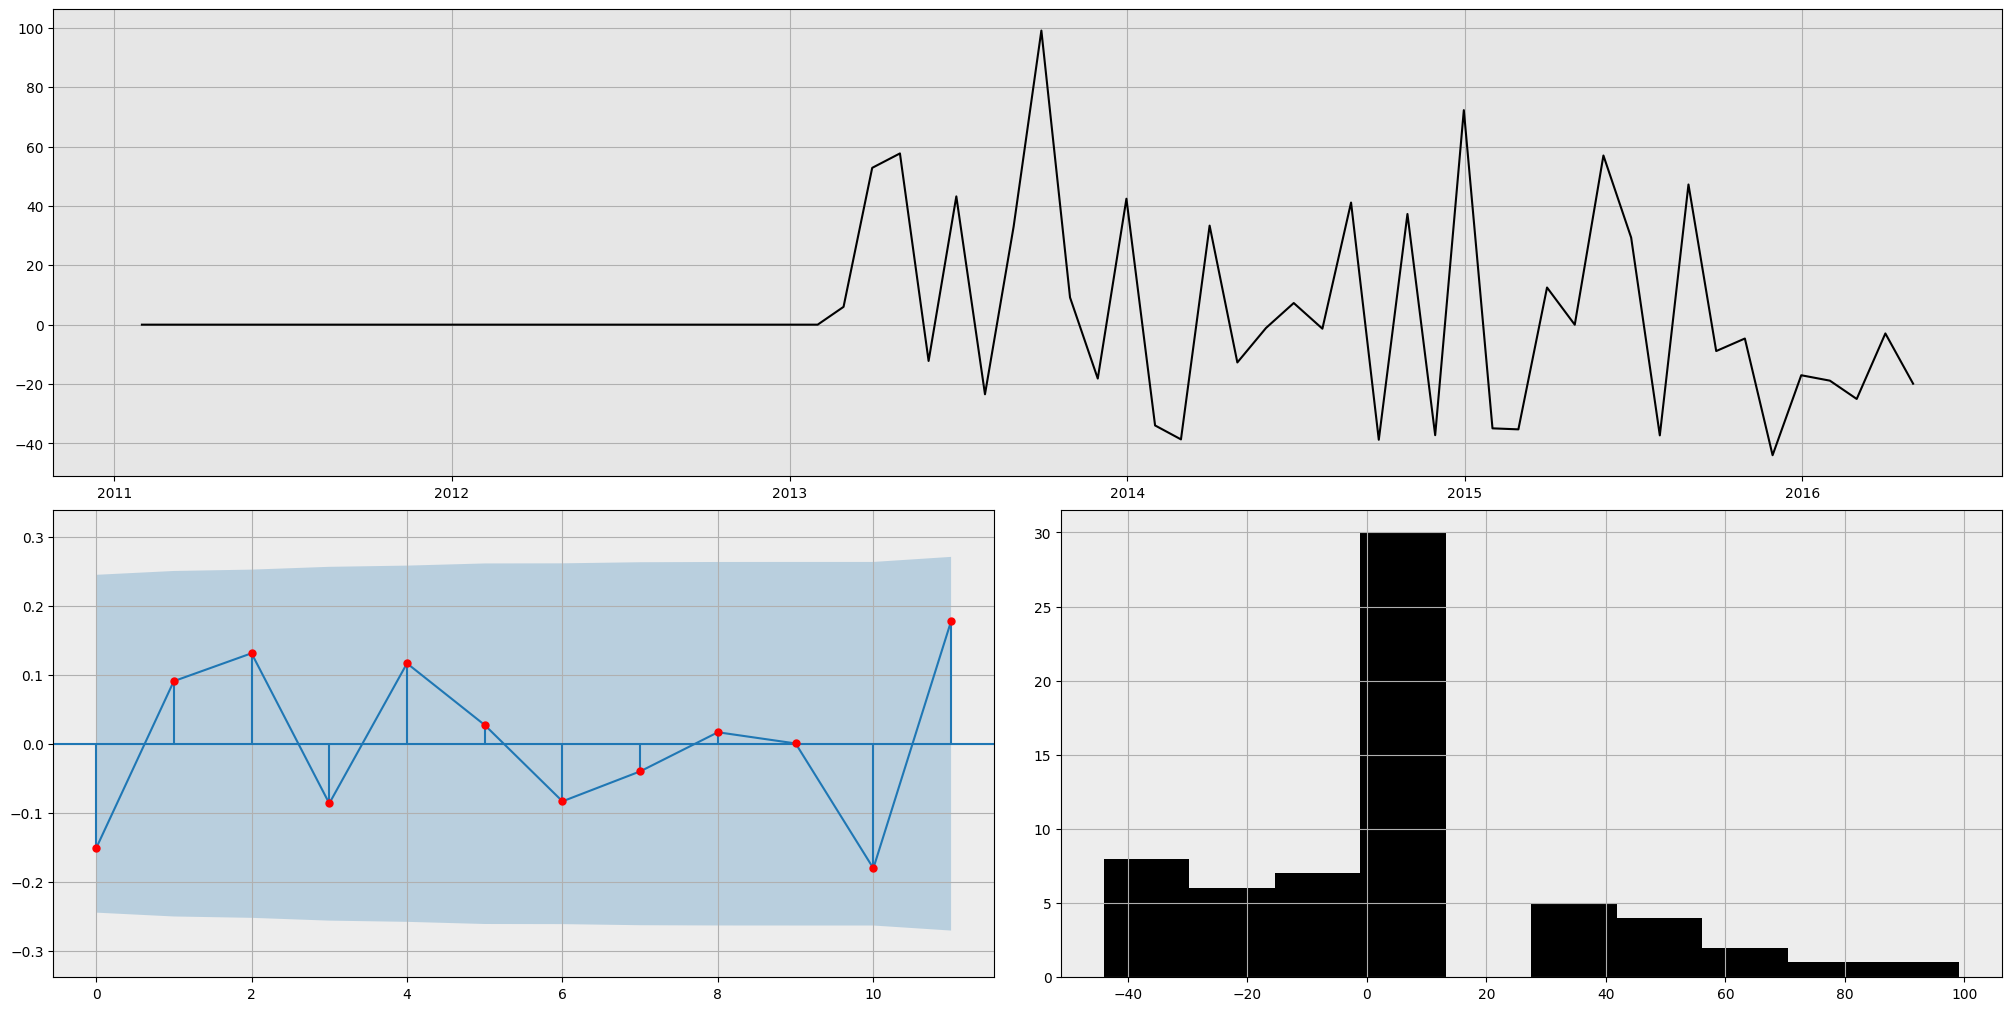

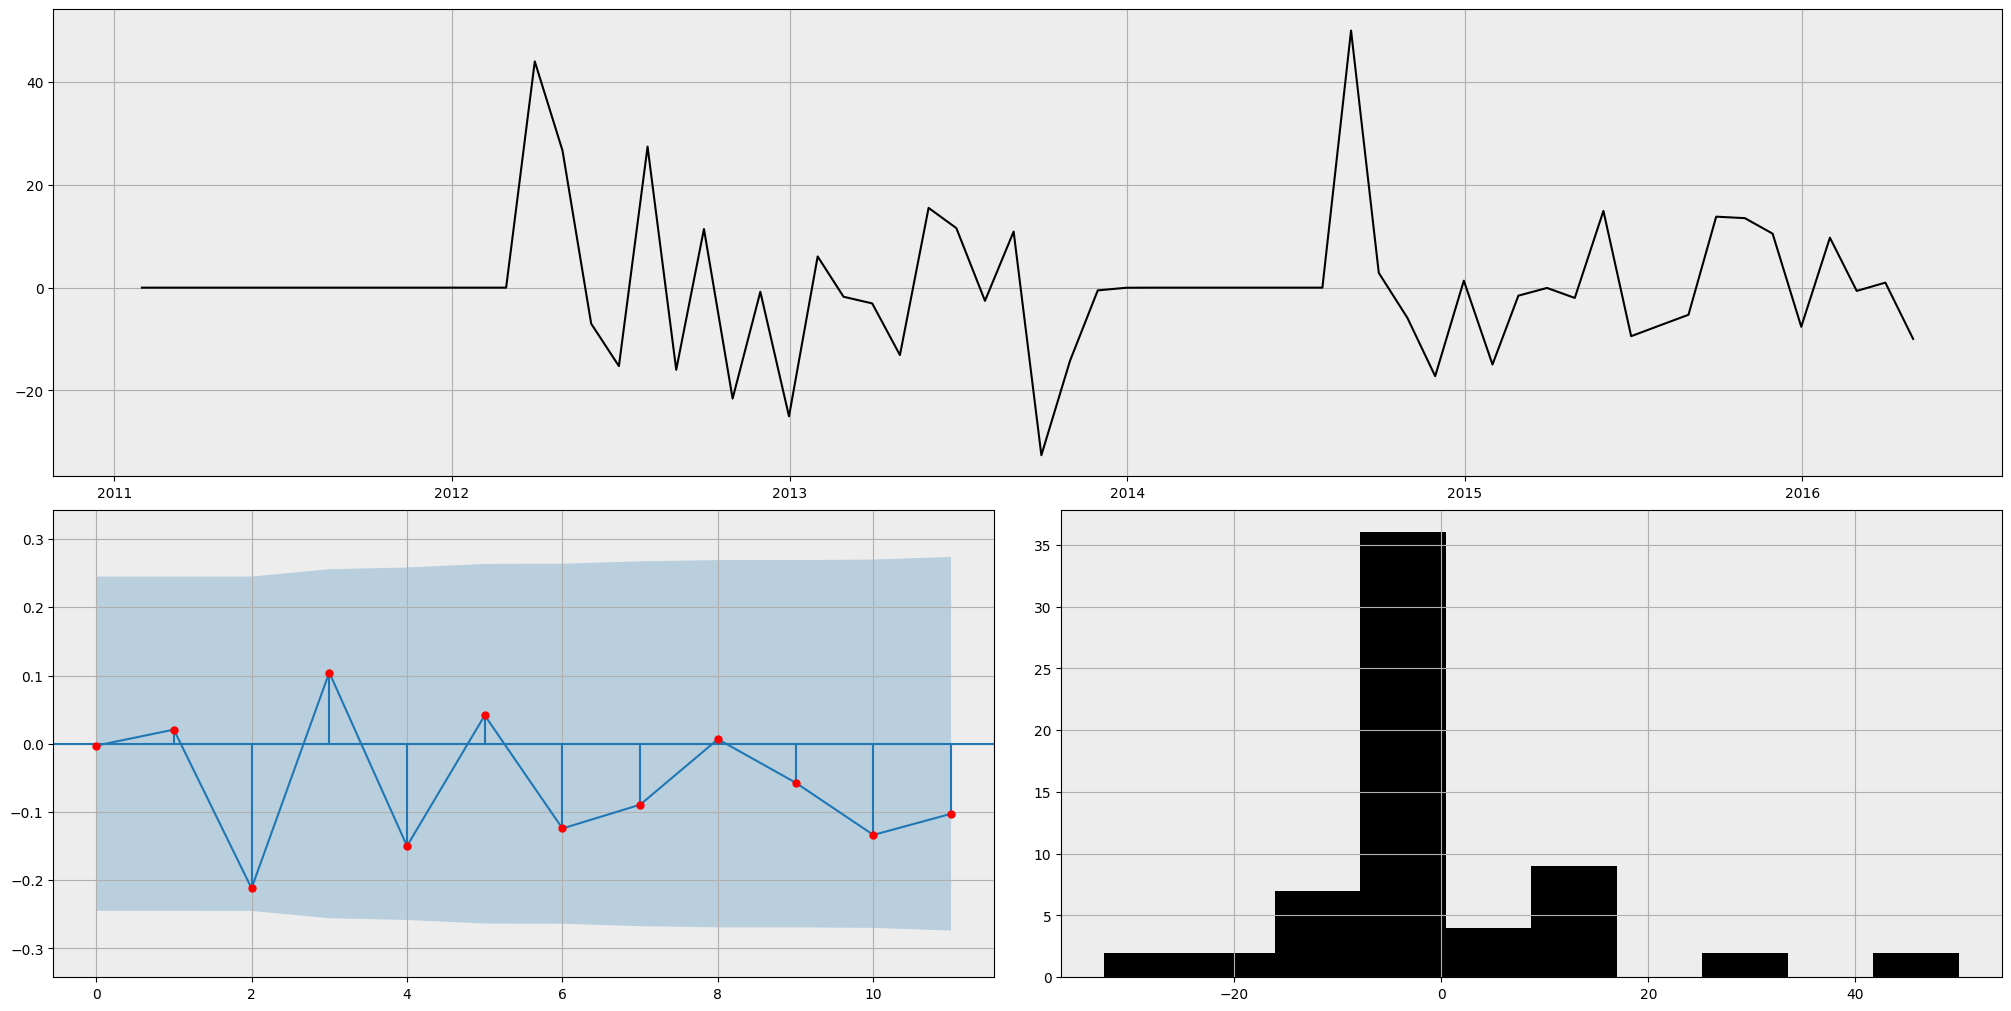

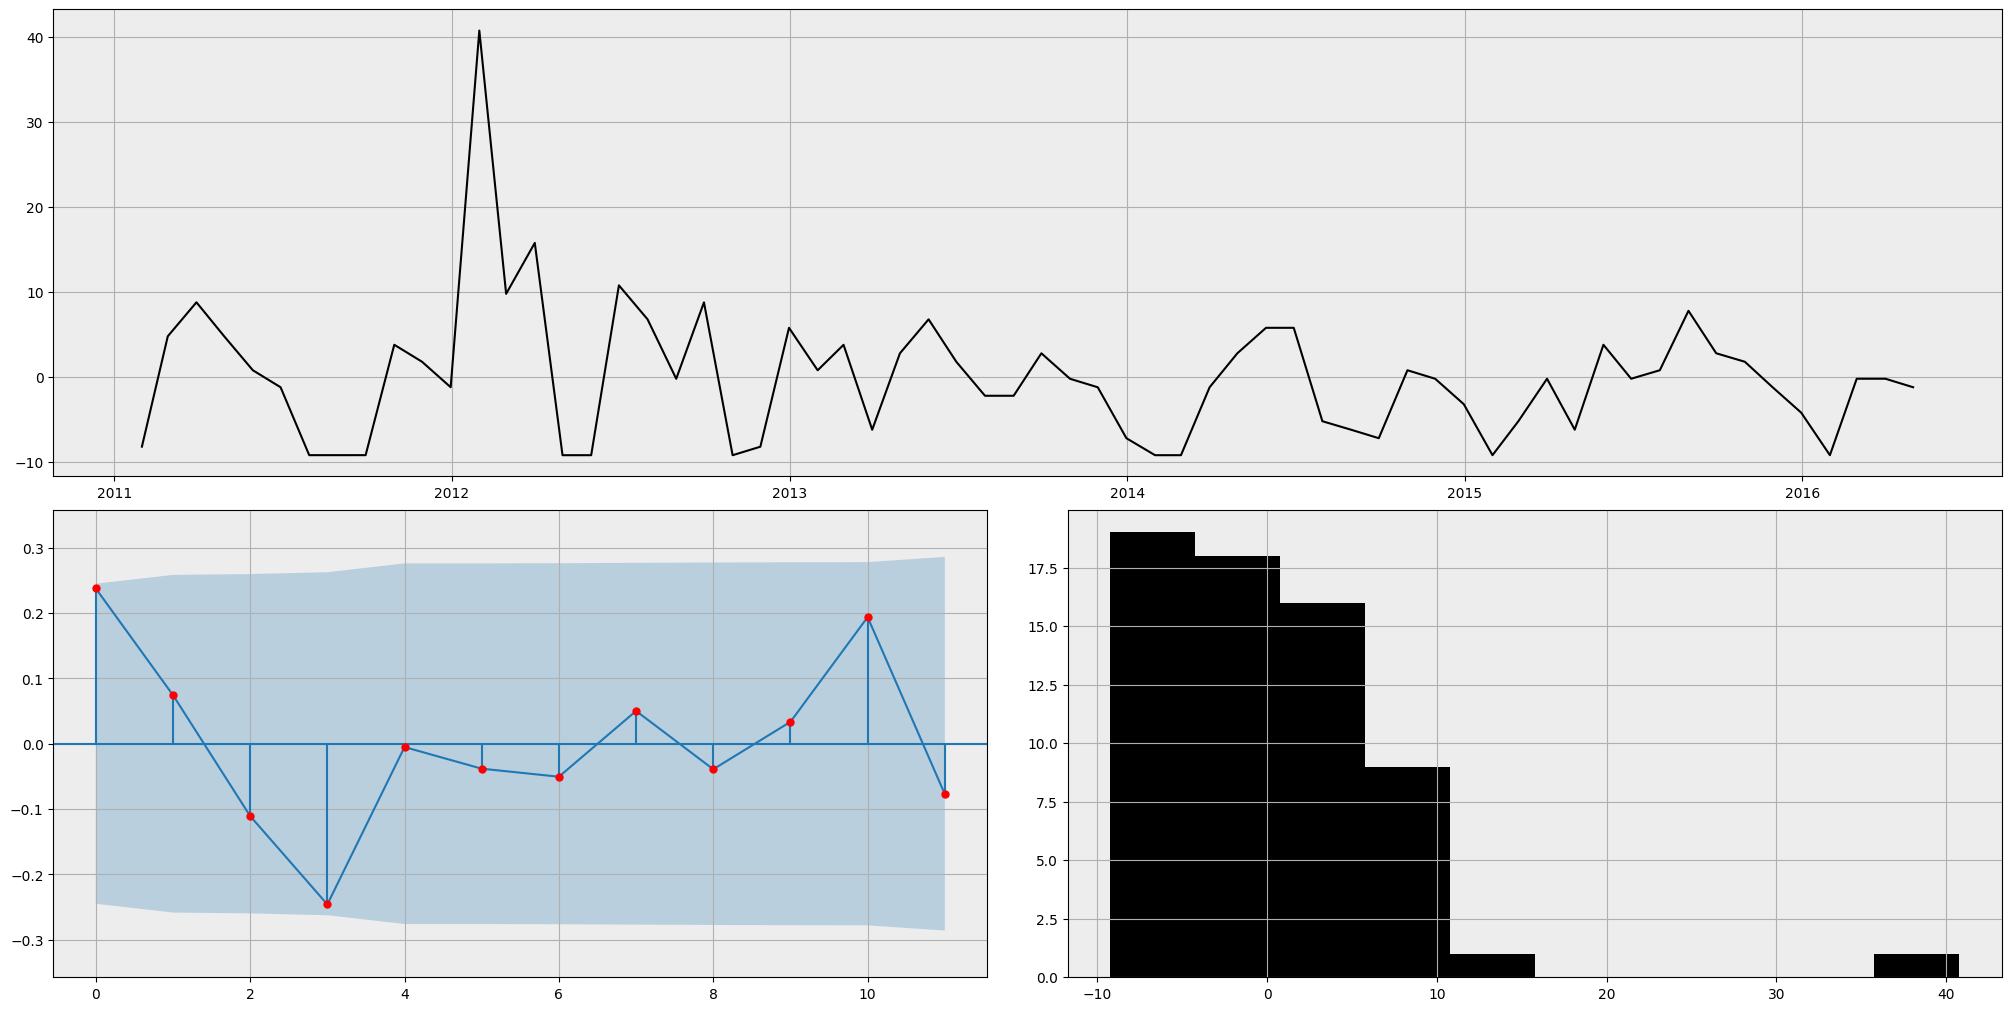

In [27]:
n = 3
selected_model = 'ETS' # we select a model
forecaster.res_diagnosis(n = 3, temp_model = 'ETS')

#### Evaluating

Next, we have to evaluate how accurate our forecasts are!

In **DeepRetail** we use the Evaluator for that!

In [21]:
from DeepRetail.evaluation import Evaluator

In [22]:
# First, we define the Evaluator object
eval = Evaluator(df = pivot_df, res_df = pred_df, freq = 'M')

Next we select the metrics we want to Evaluate the performance on.

**DeepRetail** supports all well-known metrics.

In [25]:
from DeepRetail.exploratory.metrics import mape, mse, rmsse, bias, mae, rmse

In [26]:
# Define the metrics
metrics = [mae, mape, rmse, bias, rmsse, mse]

# Hit evaluate
eval_df = eval.evaluate(metrics)

In [27]:
eval_df.head()

unique_id           Model        mae          mape       rmse  \
0  FOODS_1_156_CA_2           ARIMA  10.854454  2.574732e-01  11.964601   
1  FOODS_1_156_CA_2             ETS   4.076557  1.097990e-01   4.875821   
2  FOODS_1_156_CA_2           Naive   4.000000  1.085700e-01   4.932883   
3  FOODS_1_156_CA_2  Seasonal Naive  22.000000  5.300056e-01  23.825756   
4  FOODS_2_288_TX_1           ARIMA   5.498501  9.796460e+15   6.711955   

        bias     rmsse         mse  
0   9.623633  0.893224  143.151668  
1  -1.103664  0.364007   23.773629  
2  -1.333333  0.368267   24.333333  
3  22.000000  1.778726  567.666667  
4  -3.225284  0.691366   45.050334

In [28]:
# Now we can groupby based on the models and get the average performance
eval_df.groupby('Model').mean()

mae          mape       rmse      bias     rmsse  \
Model                                                                    
ARIMA           20.649958  3.175929e+15  24.018156  1.968066  1.310310   
ETS             19.200304  3.093646e+15  22.815436  1.562374  1.193964   
Naive           20.316092  2.847103e+15  23.840143 -2.385057  1.330451   
Seasonal Naive  24.310345  1.061193e+16  27.658134  6.080460  1.525082   

                        mse  
Model                        
ARIMA           2908.028787  
ETS             2891.088031  
Naive           2823.959770  
Seasonal Naive  3566.632184

We can also use different plots to better understand the performance of the different metrics

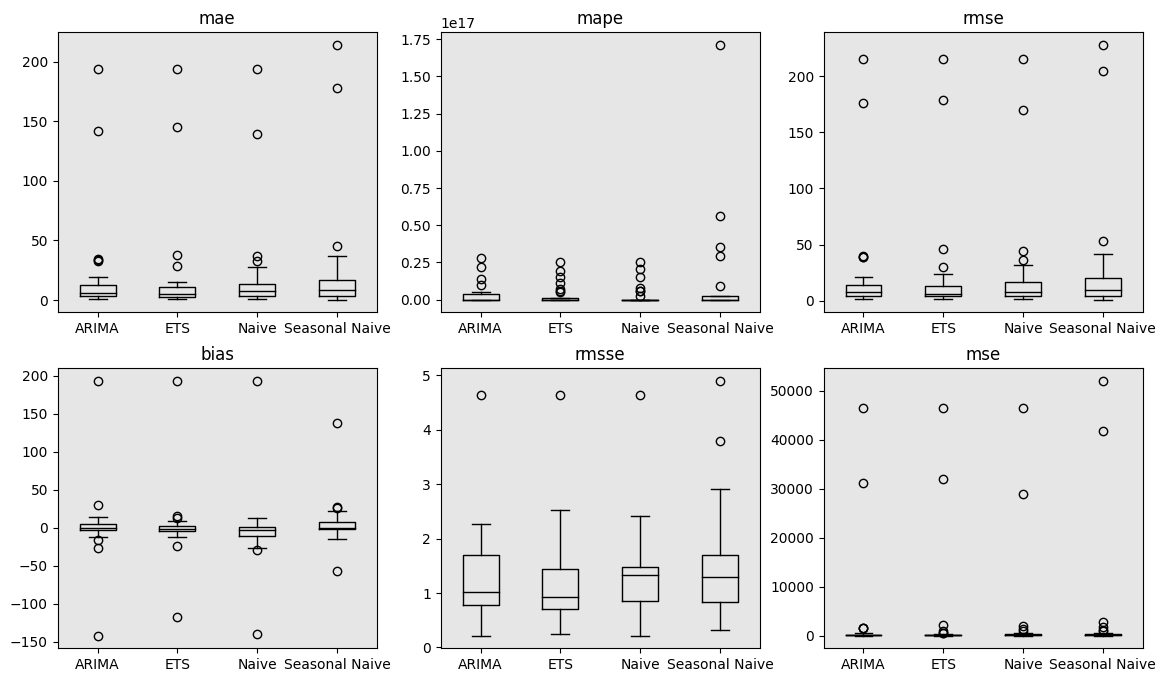

In [29]:
# Boxplot with metrics
eval.evaluate_boxplot()

Here we understand the importance of scale-independant metrics

The different time series have different scales and units.

One shop sells 10s of items while another 1000s.

MSE, RMSE, MAE and Bias can not account for these differences.

RMSSE can.

Oh, and MAPE is just scale-independant but is very bad so avoid it all costs :)

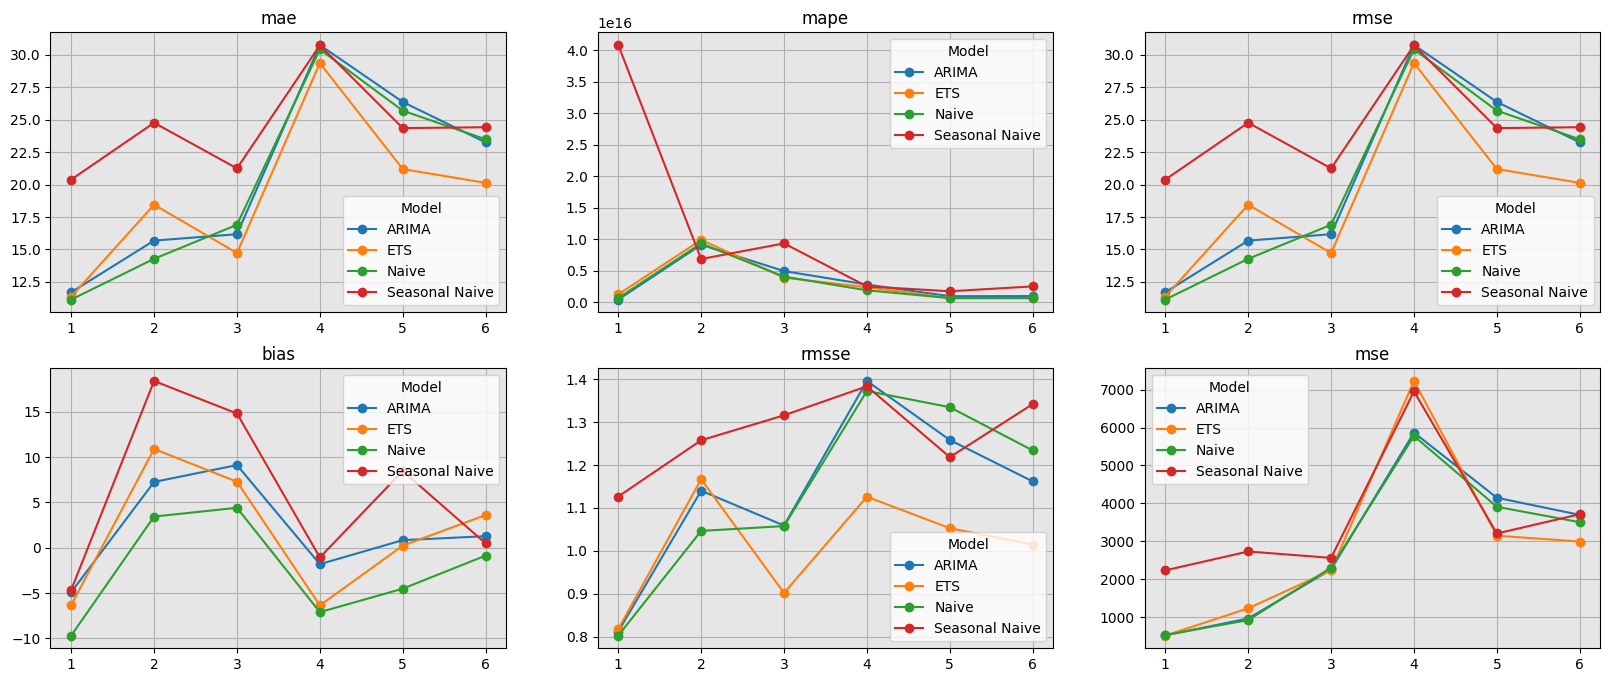

In [30]:
# Line plot
# Attention: Need to recalculate here
eval_df = eval.evaluate(metrics, per_fh = True)
eval.evaluate_lineplot()

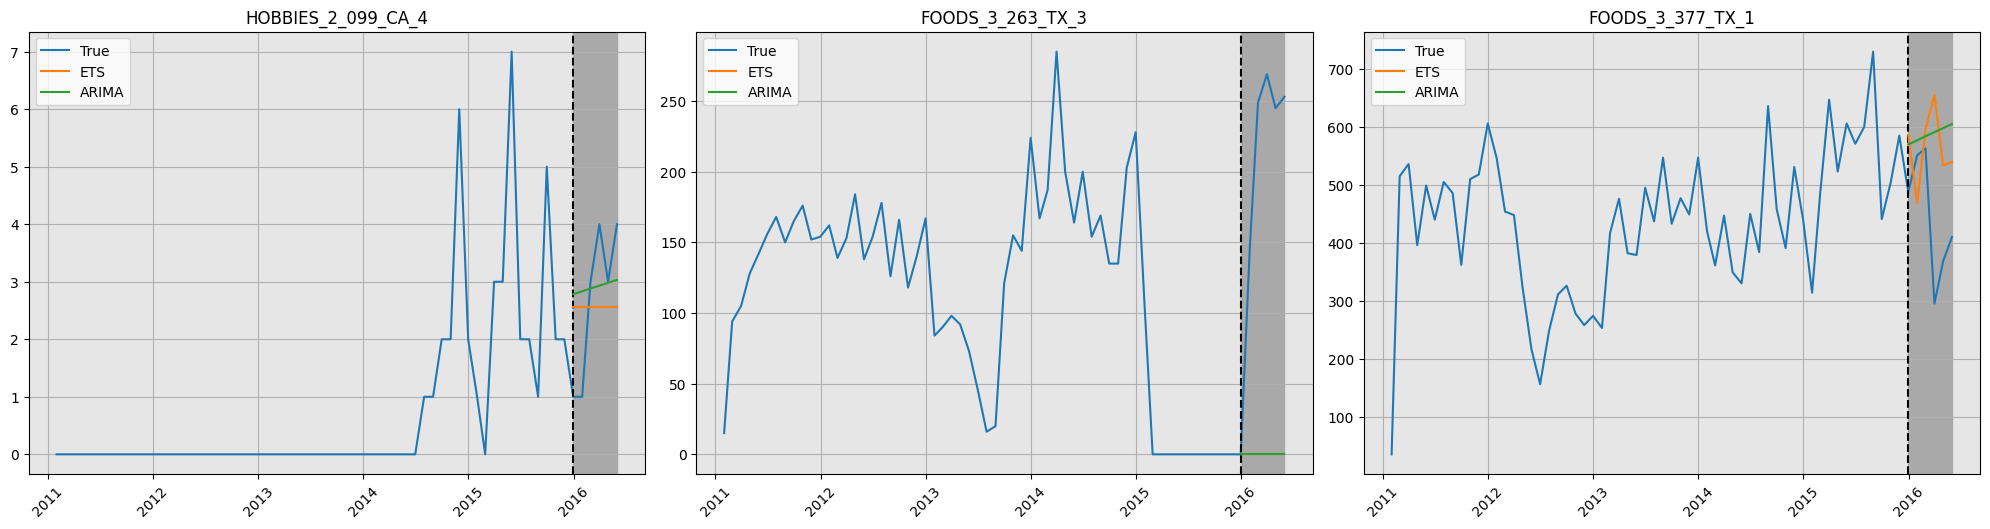

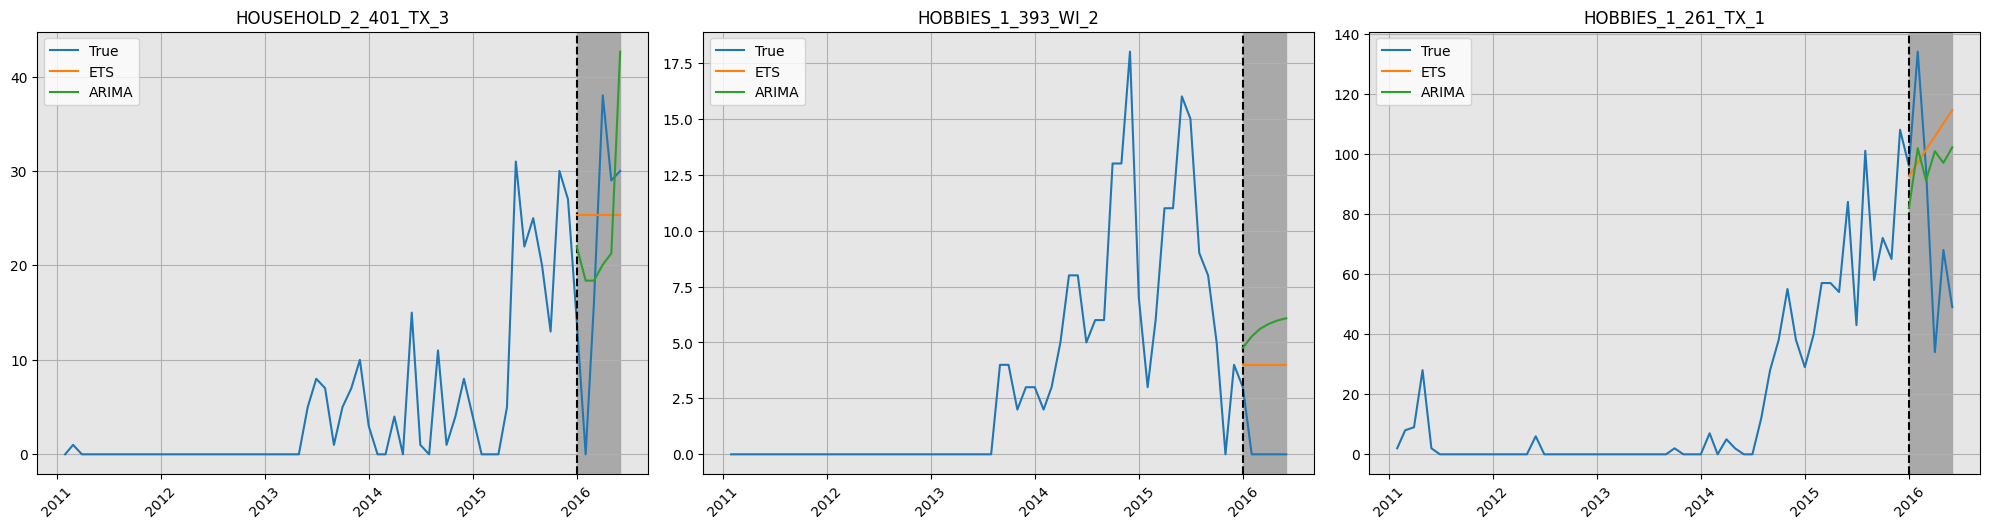

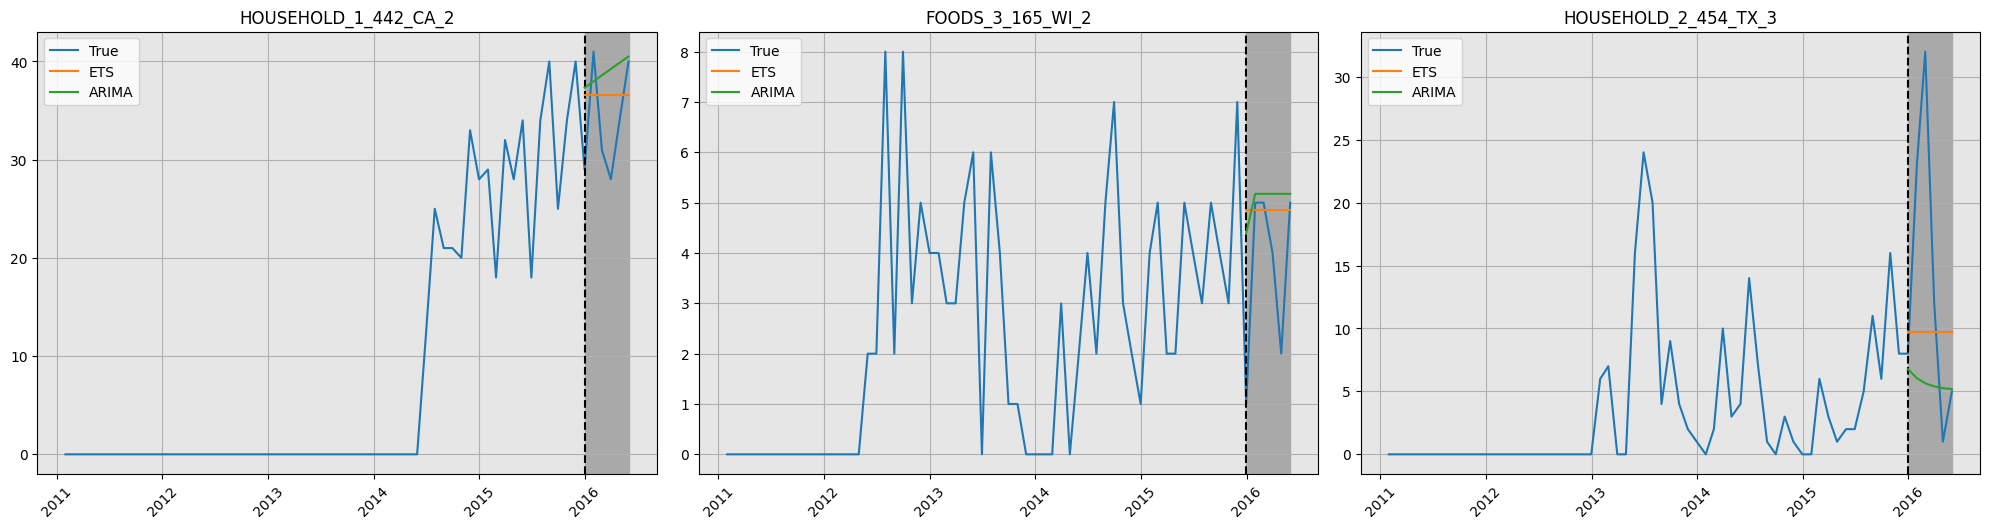

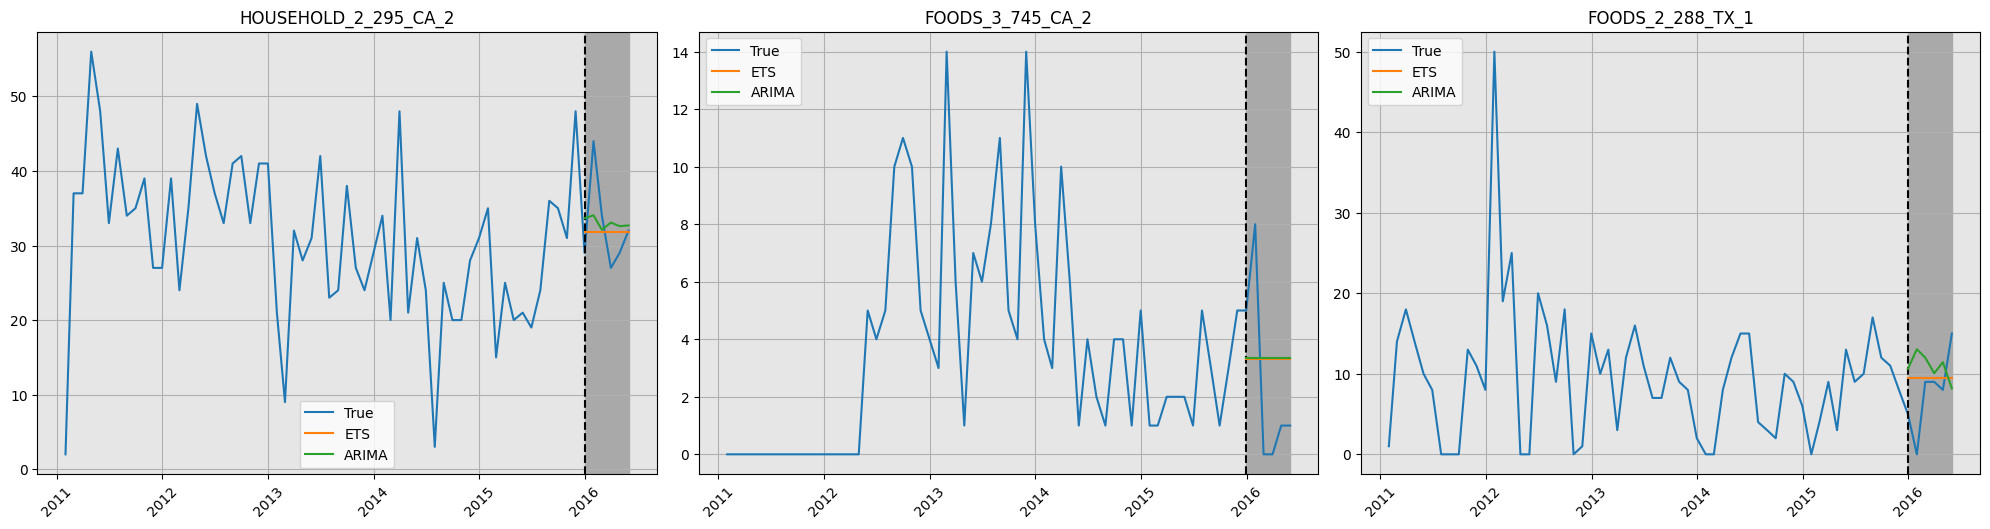

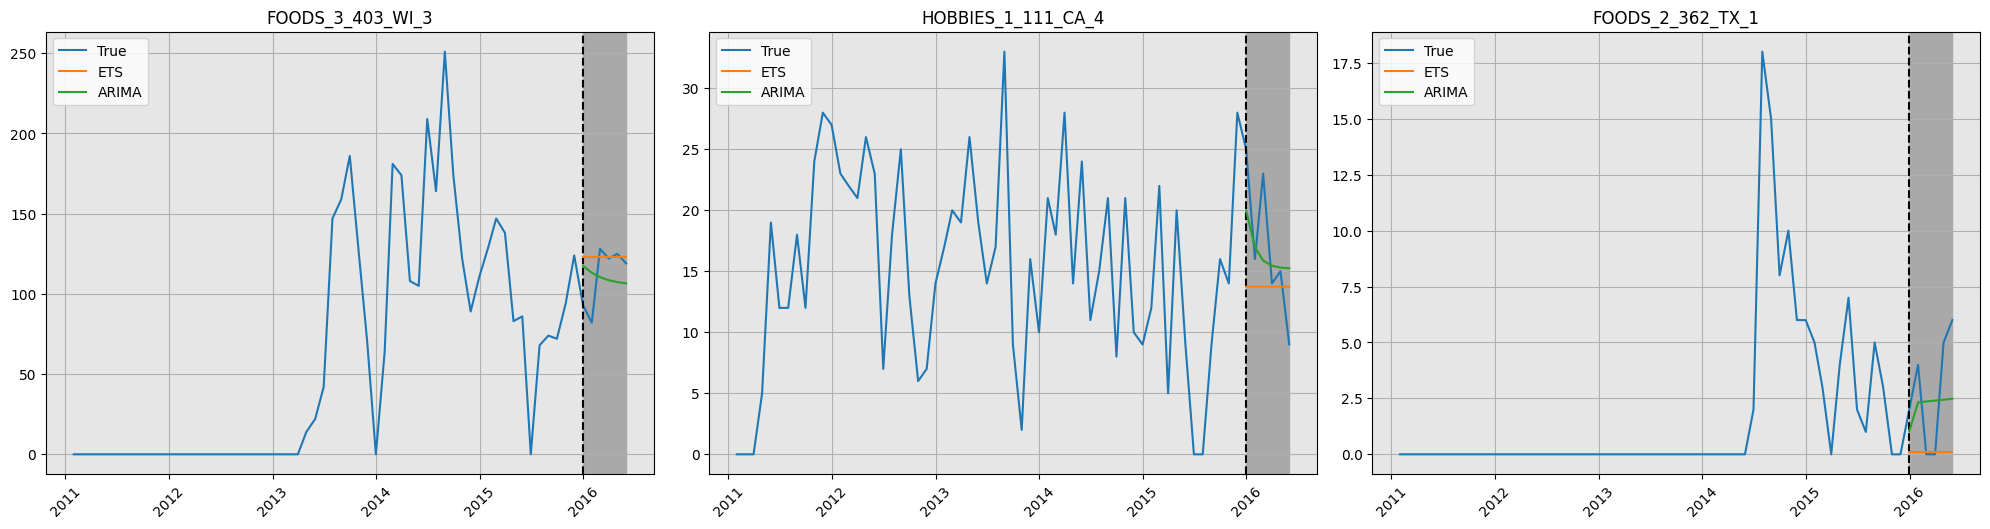

In [31]:
# Plot some forecasts
models = ['ETS', 'ARIMA']
n = 15
eval.plot_forecasts(models, n)